In [41]:
import numpy as np
from datascience import *
import math as m
import qgrid as q
import pandas as pd
from scipy.stats import chi2_contingency

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

def nan_sum(arr):
    sum = 0
    for elem in arr:
        if not math.isnan(elem):
            sum += elem

***Data Cleaning***

In [42]:
original_data = Table.read_table("community_RR_csv.csv");
q.show_grid(original_data.to_df())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [43]:
original_data_caninervis = original_data.where("Syntrichia caninervis cover", are.not_equal_to("0%"))
original_data_caninervis.column('Syntrichia caninervis cover')[0:5]

array(['5%', 'nan', 'nan', 'nan', 'nan'], dtype='<U5')

In [44]:
small_data = original_data_caninervis.drop(2,4,5,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25)
small_data.show(1000)

Coordinates,Exposure of S. caninervis,Stem height,Number of inflorescences,"Sex (M,F,S)"
T1 30,I,2.9,0,S
T1 30,I,1.7,0,S
T1 30,I,1.5,0,S
T1 30,I,2,0,S
T1 30,I,2.9,0,S
T1 30,I,3.1,1,F
T1 30,I,2.1,0,S
T1 30,I,2.8,0,S
T1 30,I,2,0,S
T1 30,I,2,0,S


***Making Bowker Table 2***

In [45]:
def my_round(num):
    return round(num, 3)

In [46]:
# Gets unique value of a column in a table and return an array
def unique_values(table, column_name):
    return table.select(column_name).group(column_name).column(column_name)

In [47]:
# Calculates a number of ramets that meet a given value in S. caninervis
# that parameter is table given is filtered by sex
def number_of_ramets(table, ramet, column, condition, that=False):
    if that == True:
        return table.where('Coordinates', ramet).where(column, condition).group(0).num_rows
    return table.where('Coordinates', ramet).where(column, condition).num_rows

In [48]:
def table2_column1(table):
    female_count = 0
    male_count = 0
    for ramet in unique_values(table, 'Coordinates'):
        female_count += number_of_ramets(table, ramet, 'Sex (M,F,S)', 'F')
        male_count += number_of_ramets(table, ramet, 'Sex (M,F,S)', 'M')
    return make_array(male_count, female_count, female_count + male_count)
table2_column1(small_data)

array([  9, 128, 137])

In [49]:
dd= small_data.to_df()
dd[dd['Sex (M,F,S)']=='F'].sort_values('Number of inflorescences')

,Coordinates,Exposure of S. caninervis,Stem height,Number of inflorescences,"Sex (M,F,S)"
719,T4 210,U,3.1,0.0,F
376,T2 645,I,2.3,0.0,F
5,T1 30,I,3.1,1.0,F
700,T4 195,I,0.9,1.0,F
670,T3 750,U,1.8,1.0,F
647,T3 675,O,2.0,1.0,F
646,T3 675,O,2.2,1.0,F
645,T3 675,O,2.2,1.0,F
644,T3 675,O,2.9,1.0,F
623,T3 645,I,2.2,1.0,F


In [50]:
def table2_column2(table):   
    male_infloresence = 0
    female_infloresence = 0
    for ramet in unique_values(table, 'Coordinates'):  
        female_infloresence += number_of_ramets(table.where('Sex (M,F,S)', 'F'), ramet, 'Number of inflorescences', are.above(0), that=True)
        male_infloresence += number_of_ramets(table.where('Sex (M,F,S)', 'M'), ramet, 'Number of inflorescences', are.above(0), that=True)
    return make_array(2, 28, 30)
table2_column2(small_data)

array([ 2, 28, 30])

In [51]:
def table2_column3(table):
    m_table = table.where('Sex (M,F,S)', 'M').where('Number of inflorescences', are.above(0))
    f_table = table.where('Sex (M,F,S)', 'F').where('Number of inflorescences', are.above(0))
    male_sum_infloresence = sum(m_table.column('Number of inflorescences'))
    female_sum_infloresence = sum(f_table.column('Number of inflorescences'))
    num_ramets = table2_column1(table)
    m_avg = my_round(male_sum_infloresence/num_ramets.item(0))
    f_avg = my_round(female_sum_infloresence/num_ramets.item(1))
    t_avg = my_round((male_sum_infloresence + female_sum_infloresence) / num_ramets.item(2))
    return make_array(m_avg, f_avg, t_avg)
table2_column3(small_data)

array([1.   , 1.195, 1.182])

In [52]:
def table2_column4(table):
    m_more_than_1 = table.where('Sex (M,F,S)', 'M').where('Number of inflorescences', are.above(1)).num_rows
    f_more_than_1 = table.where('Sex (M,F,S)', 'F').where('Number of inflorescences', are.above(1)).num_rows
    num_ramets = table2_column1(table)
    m_prop = my_round(m_more_than_1 / num_ramets.item(0))
    f_prop = my_round(f_more_than_1 / num_ramets.item(1))
    t_prop = my_round((m_more_than_1 + f_more_than_1) / num_ramets.item(2))
    return make_array(m_prop, f_prop, t_prop)
table2_column4(small_data)

array([0.   , 0.164, 0.153])

In [53]:
def table2(table):
    column1 = table2_column1(table)
    column2 = table2_column2(table)
    column3 = table2_column3(table)
    column4 = table2_column4(table)
    rtn_table = Table().with_column('Sex', ['Male', 'Female', 'Total'])
    rtn_table = rtn_table.with_columns('No. ramets expressing sex in life span', column1,
                               'No. ramets currently expressing sex', column2,
                               'No. inflorescences per ramet', column3,
                               'Proportion of ramets with >1 inflorescence', column4)
    return rtn_table
table2(small_data)

Sex,No. ramets expressing sex in life span,No. ramets currently expressing sex,No. inflorescences per ramet,Proportion of ramets with >1 inflorescence
Male,9,2,1,0
Female,128,28,1.195,0.164
Total,137,30,1.182,0.153


***Making Bowker Table 3***

In [54]:
small_data

Coordinates,Exposure of S. caninervis,Stem height,Number of inflorescences,"Sex (M,F,S)"
T1 30,I,2.9,0,S
T1 30,I,1.7,0,S
T1 30,I,1.5,0,S
T1 30,I,2,0,S
T1 30,I,2.9,0,S
T1 30,I,3.1,1,F
T1 30,I,2.1,0,S
T1 30,I,2.8,0,S
T1 30,I,2,0,S
T1 30,I,2,0,S


In [55]:
def mean_ramet_height(table):
    heights = table.column('Stem height')
    return np.mean(heights)
mean_ramet_height(small_data)

1.9042696629213482

In [56]:
def classify_height(benchmark):
    def classify_help(number):
        if (number > benchmark):
            return 'tall'
        else:
            return 'short'
    return classify_help

In [57]:
def classify_by_factor(table, col, func):
    benchmark = func(table)
    labeler = classify_height(benchmark)
    data = table.apply(labeler, col)
    col_label = col + ' classified by ' + func.__name__
    return table.with_column(col_label, data)
pre_contingency = classify_by_factor(small_data, 'Stem height', mean_ramet_height).to_df()
pre_contingency.head()

,Coordinates,Exposure of S. caninervis,Stem height,Number of inflorescences,"Sex (M,F,S)",Stem height classified by mean_ramet_height
0,T1 30,I,2.9,0.0,S,tall
1,T1 30,I,1.7,0.0,S,short
2,T1 30,I,1.5,0.0,S,short
3,T1 30,I,2.0,0.0,S,tall
4,T1 30,I,2.9,0.0,S,tall


In [58]:
contingency = pd.crosstab([pre_contingency['Exposure of S. caninervis'] , pre_contingency['Stem height classified by mean_ramet_height']], pre_contingency['Sex (M,F,S)'], margins = False)
contingency['Expressing sex'] = contingency['F'] + contingency['M']
contingency['Not expressing sex'] = contingency['S']
contingency = contingency.drop(columns = ['M','F','S'])
contingency

Sex (M,F,S)                                                            Expressing sex  \
Exposure of S. caninervis Stem height classified by mean_ramet_height                   
I                         short                                                    14   
                          tall                                                     50   
O                         short                                                     2   
                          tall                                                     28   
U                         short                                                     6   
                          tall                                                     32   
nan                       short                                                     0   
                          tall                                                      5   

Sex (M,F,S)                                                            Not expressing sex  
Exposure of S. caninervis Stem height classified by mean_ramet_height                      
I                         short                                                       193  
                          tall                                                        124  
O                         short                                                       205  
                          tall                                                         95  
U                         short                                                        52  
                          tall                                                         70  
nan                       short                                                         4  
                          tall                                                         10

In [59]:
chi2, p_val, dof, expected = chi2_contingency(contingency)
(chi2, p_val, dof, expected)

(99.40153104419883,
 1.4338726900120577e-18,
 7,
 array([[ 31.86404494, 175.13595506],
        [ 26.78426966, 147.21573034],
        [ 31.86404494, 175.13595506],
        [ 18.93370787, 104.06629213],
        [  8.92808989,  49.07191011],
        [ 15.7011236 ,  86.2988764 ],
        [  0.61573034,   3.38426966],
        [  2.30898876,  12.69101124]]))

In [60]:
def crosstab(table, label, func):
    pre_contingency = classify_by_factor(table, label, func).to_df()
    contingency = pd.crosstab([pre_contingency['Exposure of S. caninervis'] , pre_contingency[label + ' classified by ' + func.__name__]], pre_contingency['Sex (M,F,S)'], margins = False)
    contingency['Expressing sex'] = contingency['F'] + contingency['M']
    contingency['Not expressing sex'] = contingency['S']
    contingency = contingency.drop(columns = ['M','F','S'])
    return chi2_contingency(contingency)
crosstab(small_data, 'Stem height', mean_ramet_height)

(99.40153104419883,
 1.4338726900120577e-18,
 7,
 array([[ 31.86404494, 175.13595506],
        [ 26.78426966, 147.21573034],
        [ 31.86404494, 175.13595506],
        [ 18.93370787, 104.06629213],
        [  8.92808989,  49.07191011],
        [ 15.7011236 ,  86.2988764 ],
        [  0.61573034,   3.38426966],
        [  2.30898876,  12.69101124]]))

In [61]:
labels_for_x2 = ['Stem height']

In [62]:
funcs_for_x2 = [mean_ramet_height]

In [63]:
def table3(table):
    labels_for_x2 = ['Stem height']
    funcs_for_x2 = [mean_ramet_height]
    labels_func_map = dict(zip(labels_for_x2,funcs_for_x2))
    return crosstab(table, labels_for_x2[0], funcs_for_x2[0])
table3(small_data)

(99.40153104419883,
 1.4338726900120577e-18,
 7,
 array([[ 31.86404494, 175.13595506],
        [ 26.78426966, 147.21573034],
        [ 31.86404494, 175.13595506],
        [ 18.93370787, 104.06629213],
        [  8.92808989,  49.07191011],
        [ 15.7011236 ,  86.2988764 ],
        [  0.61573034,   3.38426966],
        [  2.30898876,  12.69101124]]))

***Making General Functions***

In [167]:
headers = list(small_data.labels)
headers

['Coordinates',
 'Exposure of S. caninervis',
 'Stem height',
 'Number of inflorescences',
 'Sex (M,F,S)']

In [168]:
def bowker(table):
    assert table.labels == small_data.labels, ("Column headers must be as follows: " + headers)
    return table3(table)

In [169]:
bowker(small_data)

(99.40153104419883,
 1.4338726900120577e-18,
 7,
 array([[ 31.86404494, 175.13595506],
        [ 26.78426966, 147.21573034],
        [ 31.86404494, 175.13595506],
        [ 18.93370787, 104.06629213],
        [  8.92808989,  49.07191011],
        [ 15.7011236 ,  86.2988764 ],
        [  0.61573034,   3.38426966],
        [  2.30898876,  12.69101124]]))

In [170]:
small_data

Coordinates,Exposure of S. caninervis,Stem height,Number of inflorescences,"Sex (M,F,S)"
T1 30,I,2.9,0,S
T1 30,I,1.7,0,S
T1 30,I,1.5,0,S
T1 30,I,2,0,S
T1 30,I,2.9,0,S
T1 30,I,3.1,1,F
T1 30,I,2.1,0,S
T1 30,I,2.8,0,S
T1 30,I,2,0,S
T1 30,I,2,0,S


(0.3008562793583733, -2.740863092043355e-16)

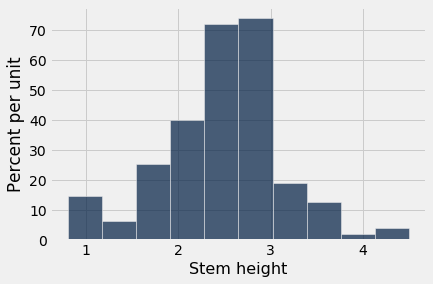

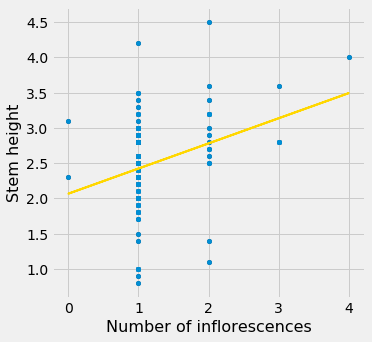

In [171]:
#distribution of stem height for females
small_data.where('Sex (M,F,S)', 'F').hist('Stem height')
small_data.where('Sex (M,F,S)', 'F').scatter('Number of inflorescences','Stem height')
scatter_fit(small_data.where('Sex (M,F,S)', 'F'),'Number of inflorescences','Stem height')
correlation(small_data.where('Sex (M,F,S)', 'F'),'Number of inflorescences','Stem height'), np.mean(residual(small_data.where('Sex (M,F,S)', 'F'),'Number of inflorescences','Stem height'))

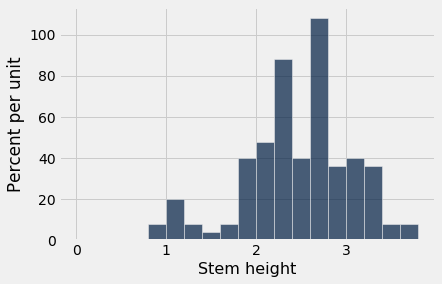

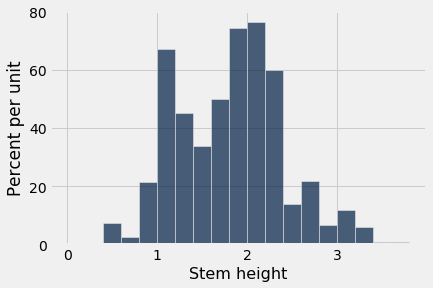

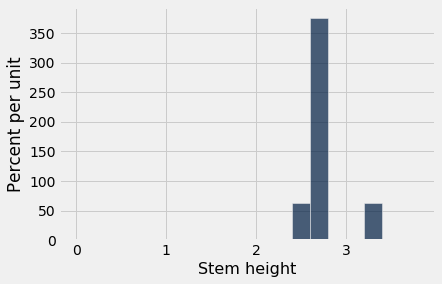

In [172]:
small_data.where('Sex (M,F,S)', 'F').hist('Stem height', bins=np.arange(0,4,0.2))
small_data.where('Sex (M,F,S)', 'S').hist('Stem height', bins=np.arange(0,4,0.2))
small_data.where('Sex (M,F,S)', 'M').hist('Stem height', bins=np.arange(0,4,0.2))

***Looking at Our Data***

In [311]:
height_data = small_data.select(0,2).group("Coordinates", np.average)
height_data

Coordinates,Stem height average
T1 105,1.96
T1 135,1.84
T1 150,1.1
T1 165,1.03
T1 180,1.47
T1 195,1.16
T1 210,1.54
T1 240,2.48
T1 30,2.3
T1 45,1.38


In [312]:
our_data_unclean = Table.read_table("sex_ratio_data_final.csv")
our_data_unclean

Genomics_ID,Sample_ID,loc,lat,lon,Species,Expressed Sex,Collector,Collection Year,Extraction #,PCR #,DIGEST #,Inferred Genetic Sex,NOTES,Gel Date,Lab,Unnamed: 16,Unnamed: 17,Unnamed: 18
GJB341,BOWKER-T1-30,nan,nan,nan,S. caninervis,U,M. Bowker,1997,17,39,24,F,nan,nan,Mishler,nan,nan,nan
GJB342,BOWKER-T1-30,nan,nan,nan,S. caninervis,U,M. Bowker,1997,17,39,24,F,nan,nan,Mishler,nan,nan,nan
GJB343,BOWKER-T1-30,nan,nan,nan,S. caninervis,U,M. Bowker,1997,17,39,24,F,nan,nan,Mishler,nan,nan,nan
GJB344,BOWKER-T1-30,nan,nan,nan,S. caninervis,U,M. Bowker,1997,17,39,24,F,nan,nan,Mishler,nan,count F,257
GJB345,BOWKER-T1-30,nan,nan,nan,S. caninervis,U,M. Bowker,1997,17,39,24,F,nan,nan,Mishler,nan,count M,14
GJB346,BOWKER-T1-30,nan,nan,nan,S. caninervis,U,M. Bowker,1997,17,39,24,F,nan,nan,Mishler,nan,count fail (blank),126
GJB347,BOWKER-T1-30,nan,nan,nan,S. caninervis,U,M. Bowker,1997,18,42,24,F,nan,nan,Mishler,nan,successful PCRs,271
GJB348,BOWKER-T1-30,nan,nan,nan,S. caninervis,U,M. Bowker,1997,18,42,24,F,nan,nan,Mishler,nan,nan,nan
GJB349,BOWKER-T1-30,nan,nan,nan,S. caninervis,U,M. Bowker,1997,18,42,24,F,nan,nan,Mishler,nan,nan,nan
GJB349*,BOWKER-T1-30.1,nan,nan,nan,S. caninervis,U,M. Bowker,1997,nan,39,24,F,DIRECT LEAF PCR,nan,Mishler,nan,nan,nan


In [313]:
our_data = our_data_unclean.select("Genomics_ID","Sample_ID","Inferred Genetic Sex").where('Inferred Genetic Sex', are.not_equal_to('nan'))
our_data

Genomics_ID,Sample_ID,Inferred Genetic Sex
GJB341,BOWKER-T1-30,F
GJB342,BOWKER-T1-30,F
GJB343,BOWKER-T1-30,F
GJB344,BOWKER-T1-30,F
GJB345,BOWKER-T1-30,F
GJB346,BOWKER-T1-30,F
GJB347,BOWKER-T1-30,F
GJB348,BOWKER-T1-30,F
GJB349,BOWKER-T1-30,F
GJB349*,BOWKER-T1-30.1,F


In [314]:
def transect(str):
    for i in range(len(str)):
        if str[i] == "T":
            end = i + 2
            return str[i:i+2]

In [315]:
transect("BOWKER-T1-30")

'T1'

In [316]:
def loc(str):
    for i in range(len(str)):
        if str[i] == "T":
            start = i + 3
            for i in range(start, len(str)):
                if str[i] == ".":
                    return str[start:i]
            return str[start:]

In [317]:
loc("BOWKER-T1-30")

'30'

In [318]:
transect_data = our_data.apply(transect, "Sample_ID")
location_data = our_data.apply(loc, "Sample_ID")
location_and_sex = our_data.drop(1).with_columns("Transect", transect_data, "Location on Transect", location_data)
#unique_values(location_and_sex, 'Location on Transect')
location_and_sex

Genomics_ID,Inferred Genetic Sex,Transect,Location on Transect
GJB341,F,T1,30
GJB342,F,T1,30
GJB343,F,T1,30
GJB344,F,T1,30
GJB345,F,T1,30
GJB346,F,T1,30
GJB347,F,T1,30
GJB348,F,T1,30
GJB349,F,T1,30
GJB349*,F,T1,30


In [319]:
t1_data = location_and_sex.where("Transect", "T1")
t1_data

Genomics_ID,Inferred Genetic Sex,Transect,Location on Transect
GJB341,F,T1,30
GJB342,F,T1,30
GJB343,F,T1,30
GJB344,F,T1,30
GJB345,F,T1,30
GJB346,F,T1,30
GJB347,F,T1,30
GJB348,F,T1,30
GJB349,F,T1,30
GJB349*,F,T1,30


In [320]:
def group_check(table):
    count = 0
    for elem in table.column("Inferred Genetic Sex"):
        count += 1
    if count == 1:
        return table.append(Table().with_columns("Inferred Genetic Sex", make_array("M"), "count", 0))
    return table

In [321]:
def female_and_male_count(table, transect, loc):
    new_table = table.where("Location on Transect", loc)
    group_table = group_check(new_table.group("Inferred Genetic Sex"))
    rtn_table = Table().with_columns("Transect", make_array(transect, transect), 
                                   "Location on Transect", make_array(loc, loc),
                                   "Sex", make_array("F", "M"))
    return rtn_table.with_column("Sex Count", group_table.column("count"))

In [322]:
female_and_male_count(t1_data, "T1", "45")

Transect,Location on Transect,Sex,Sex Count
T1,45,F,9
T1,45,M,0


In [323]:
height_data.sort("Stem height average")

Coordinates,Stem height average
T4 195,0.95
T4 435,0.95
T1 165,1.03
T1 150,1.1
T1 195,1.16
T4 225,1.17
T4 600,1.2
T2 255,1.21
T2 390,1.23
T2 45,1.29


In [324]:
original_data = Table.read_table("community_RR_csv.csv");
original_data.select(0,6,9).where("Sex (M,F,S)", "M")

Coordinates,Number of inflorescences,"Sex (M,F,S)"
T2 30,1,M
T3 645,1,M
T3 645,1,M
T3 645,1,M
T4 585,1,M
T4 585,1,M
T4 585,1,M
T4 585,1,M
T4 585,1,M


In [325]:
original_data.select(0,1,9).where("Sex (M,F,S)", "M")

Coordinates,Exposure of S. caninervis,"Sex (M,F,S)"
T2 30,U,M
T3 645,I,M
T3 645,I,M
T3 645,I,M
T4 585,I,M
T4 585,I,M
T4 585,I,M
T4 585,I,M
T4 585,I,M


***For Botany Talk***

In [326]:
def phe_group(table):
    try:
        female = table.where("Sex (M,F,S)", "F").column(1).item(0)
    except:
        female = 0
    
    try:
        male = table.where("Sex (M,F,S)", "M").column(1).item(0)
    except:
        male = 0
    
    try:
        sterile = table.where("Sex (M,F,S)", "S").column(1).item(0)
    except:
        sterile = 0
    
    return Table().with_columns("Sex (M,F,S)", make_array("F", "M", "S"), "count", make_array(female, male, sterile))

In [327]:
partial_data = small_data.drop(3).with_columns("Transect", small_data.apply(transect, "Coordinates"), "Location on Transect", small_data.apply(loc, "Coordinates"))
phe_group(partial_data.where("Coordinates", "T2 210").group(3))

"Sex (M,F,S)",count
F,0
M,0
S,10


In [328]:
def phenotypic_count(table):
    population = unique_values(partial_data, "Coordinates")
    phe_males = make_array()
    phe_females = make_array()
    steriles = make_array()
    exposures = make_array()
    for coordinate in population:
        temp = table.where("Coordinates", coordinate)
        exposures = np.append(exposures, temp.column(1).item(0))
        sex_data = phe_group(temp.group(3))
        phe_females = np.append(phe_females, sex_data.where("Sex (M,F,S)", "F").column(1).item(0))
        phe_males = np.append(phe_males, sex_data.where("Sex (M,F,S)", "M").column(1).item(0))
        steriles = np.append(steriles, sex_data.where("Sex (M,F,S)", "S").column(1).item(0))
    skeleton = Table().with_columns("Population", population,
                                    "Sterile", steriles,
                                    "Phenotypic Males", phe_males,
                                    "Phenotypic Females", phe_females,
                                    "Exposure", exposures)
    return skeleton.join("Population", height_data, "Coordinates")

In [329]:
phen_count = phenotypic_count(partial_data).relabel("Stem height average", "Stem Height Average")
phen_count#.to_df()['Sterile']

Population,Sterile,Phenotypic Males,Phenotypic Females,Exposure,Stem Height Average
T1 105,9,0,1,I,1.96
T1 135,10,0,0,I,1.84
T1 150,10,0,0,I,1.1
T1 165,10,0,0,I,1.03
T1 180,10,0,0,I,1.47
T1 195,10,0,0,I,1.16
T1 210,10,0,0,I,1.54
T1 240,6,0,4,I,2.48
T1 30,9,0,1,I,2.3
T1 45,10,0,0,I,1.38


In [330]:
genetic_sex = location_and_sex.drop(0)
genetic_sex

Inferred Genetic Sex,Transect,Location on Transect
F,T1,30
F,T1,30
F,T1,30
F,T1,30
F,T1,30
F,T1,30
F,T1,30
F,T1,30
F,T1,30
F,T1,30


In [331]:
def gen_group(table):
    p = table.to_df()['Inferred Genetic Sex'].value_counts()
    try:
        female = p['F']
    except:
        female = 0
    try:
        male = p['M']
    except:
        male = 0
    
    return Table().with_columns("Inferred Genetic Sex", make_array("F", "M"), "count", make_array(female, male))

In [332]:
gs = genetic_sex.to_df()#['Inferred Genetic Sex']#.value_counts()#['F']
gs["Population"] = gs['Transect'] + " " + gs["Location on Transect"].astype(str)
dumb = pd.get_dummies(gs[['Inferred Genetic Sex']])
dumb["Population"] = gs["Population"]
pre_gen_count = dumb.groupby("Population").sum().rename(columns={"Inferred Genetic Sex_F":"Genotypic Females", "Inferred Genetic Sex_M":"Genotypic Males"}).reset_index()
pre_gen_count

,Population,Genotypic Females,Genotypic Males
0,T1 105,10,0
1,T1 135,10,0
2,T1 150,7,0
3,T1 165,7,0
4,T1 180,9,0
5,T1 195,10,0
6,T1 210,4,0
7,T1 240,10,0
8,T1 30,10,0
9,T1 45,9,0


In [333]:
def genetic_count(table):
    population = make_array()
    males = make_array()
    females = make_array()
    for transect in ["T1", "T2", "T3", "T4"]:
        transect_table = table.where("Transect", transect)
        for loc in unique_values(transect_table, "Location on Transect"):
            population = np.append(population, transect + " " + loc)
            this_table = transect_table.where("Location on Transect", loc)
            sex_data = gen_group(this_table.group(0))
            females = np.append(females, sex_data.where("Inferred Genetic Sex", "F").column(1).item(0))
            males = np.append(males, sex_data.where("Inferred Genetic Sex", "M").column(1).item(0))
    skeleton = Table().with_columns("Population", population, 
                                    "Genotypic Males", males,
                                    "Genotypic Females", females)
    return skeleton

In [334]:
gen_count = Table().from_df(pre_gen_count)
gen_count

Population,Genotypic Females,Genotypic Males
T1 105,10,0
T1 135,10,0
T1 150,7,0
T1 165,7,0
T1 180,9,0
T1 195,10,0
T1 210,4,0
T1 240,10,0
T1 30,10,0
T1 45,9,0


In [335]:
merged_table_unclean = phen_count.join("Population", gen_count)
merged_table_unclean.show()

Population,Sterile,Phenotypic Males,Phenotypic Females,Exposure,Stem Height Average,Genotypic Females,Genotypic Males
T1 105,9,0,1,I,1.96,10,0
T1 135,10,0,0,I,1.84,10,0
T1 150,10,0,0,I,1.1,7,0
T1 165,10,0,0,I,1.03,7,0
T1 180,10,0,0,I,1.47,9,0
T1 195,10,0,0,I,1.16,10,0
T1 210,10,0,0,I,1.54,4,0
T1 240,6,0,4,I,2.48,10,0
T1 30,9,0,1,I,2.3,10,0
T1 45,10,0,0,I,1.38,9,0


In [336]:
merged_table = Table().with_columns("Population", merged_table_unclean.column(0),
                                   "Sterile", merged_table_unclean.column(1),
                                   "Phenotypic Males", merged_table_unclean.column(2),
                                   "Phenotypic Females", merged_table_unclean.column(3),
                                   "Genotypic Males", merged_table_unclean.column(6),
                                   "Genotypic Females", merged_table_unclean.column(7),
                                   "Exposure", merged_table_unclean.column(4),
                                   "Stem Height Average", merged_table_unclean.column(5))
merged_table.show()

Population,Sterile,Phenotypic Males,Phenotypic Females,Genotypic Males,Genotypic Females,Exposure,Stem Height Average
T1 105,9,0,1,10,0,I,1.96
T1 135,10,0,0,10,0,I,1.84
T1 150,10,0,0,7,0,I,1.1
T1 165,10,0,0,7,0,I,1.03
T1 180,10,0,0,9,0,I,1.47
T1 195,10,0,0,10,0,I,1.16
T1 210,10,0,0,4,0,I,1.54
T1 240,6,0,4,10,0,I,2.48
T1 30,9,0,1,10,0,I,2.3
T1 45,10,0,0,9,0,I,1.38


In [337]:
gen_entries = merged_table.column(0)
gen_entries

array(['T1 105', 'T1 135', 'T1 150', 'T1 165', 'T1 180', 'T1 195',
       'T1 210', 'T1 240', 'T1 30', 'T1 45', 'T1 75', 'T2 120', 'T2 135',
       'T2 210', 'T2 225', 'T2 255', 'T2 270', 'T2 285', 'T2 30',
       'T2 315', 'T2 330', 'T2 345', 'T2 360', 'T2 390', 'T2 45', 'T2 60',
       'T2 75', 'T2 90', 'T3 105', 'T3 135', 'T3 210', 'T3 285', 'T3 315',
       'T3 390', 'T3 465', 'T3 540', 'T3 600', 'T4 585', 'T4 600',
       'T4 90'], dtype='<U6')

In [338]:
gen_males_verbose = make_array()
gen_females_verbose = make_array()
for coordinate in unique_values(partial_data, "Coordinates"):
    if coordinate in gen_entries:
        coord_table = merged_table.where("Population", coordinate)
        gen_males_verbose = np.append(gen_males_verbose, coord_table.column(4).item(0))
        gen_females_verbose = np.append(gen_females_verbose, coord_table.column(5).item(0))
    else:
        gen_males_verbose = np.append(gen_males_verbose, np.nan)
        gen_females_verbose = np.append(gen_females_verbose, np.nan)
phe_table_plus_gen = phen_count.with_columns("Genotypic Males", gen_males_verbose, 
                                             "Genotypic Females", gen_females_verbose).move_to_end("Exposure").move_to_end("Stem Height Average")
phe_table_plus_gen

Population,Sterile,Phenotypic Males,Phenotypic Females,Genotypic Males,Genotypic Females,Exposure,Stem Height Average
T1 105,9,0,1,10,0,I,1.96
T1 135,10,0,0,10,0,I,1.84
T1 150,10,0,0,7,0,I,1.1
T1 165,10,0,0,7,0,I,1.03
T1 180,10,0,0,9,0,I,1.47
T1 195,10,0,0,10,0,I,1.16
T1 210,10,0,0,4,0,I,1.54
T1 240,6,0,4,10,0,I,2.48
T1 30,9,0,1,10,0,I,2.3
T1 45,10,0,0,9,0,I,1.38


In [339]:
total_average_stem_height = np.average(phe_table_plus_gen.column(7))
total_average_stem_height

1.9042696629213482

In [340]:
df = phe_table_plus_gen.to_df()

In [341]:
df["Successful PCRs"] = df["Genotypic Males"] + df["Genotypic Females"]
df["Number to Resample"] = 10 - df["Successful PCRs"]
df[df["Successful PCRs"] < 10][["Population", "Number to Resample"]]

,Population,Number to Resample
2,T1 150,3.0
3,T1 165,3.0
4,T1 180,1.0
6,T1 210,6.0
9,T1 45,1.0
12,T2 120,2.0
13,T2 135,1.0
14,T2 210,3.0
15,T2 225,8.0
16,T2 255,3.0


In [342]:
np.average(df['Successful PCRs'].dropna())

6.65

# Jenna's Text

In [343]:
df

,Population,Sterile,Phenotypic Males,Phenotypic Females,Genotypic Males,Genotypic Females,Exposure,Stem Height Average,Successful PCRs,Number to Resample
0,T1 105,9.0,0.0,1.0,10.0,0.0,I,1.96,10.0,0.0
1,T1 135,10.0,0.0,0.0,10.0,0.0,I,1.84,10.0,0.0
2,T1 150,10.0,0.0,0.0,7.0,0.0,I,1.10,7.0,3.0
3,T1 165,10.0,0.0,0.0,7.0,0.0,I,1.03,7.0,3.0
4,T1 180,10.0,0.0,0.0,9.0,0.0,I,1.47,9.0,1.0
5,T1 195,10.0,0.0,0.0,10.0,0.0,I,1.16,10.0,0.0
6,T1 210,10.0,0.0,0.0,4.0,0.0,I,1.54,4.0,6.0
7,T1 240,6.0,0.0,4.0,10.0,0.0,I,2.48,10.0,0.0
8,T1 30,9.0,0.0,1.0,10.0,0.0,I,2.30,10.0,0.0
9,T1 45,10.0,0.0,0.0,9.0,0.0,I,1.38,9.0,1.0


In [344]:
print("# of Ramets successfully genotyped is " + str(sum(df['Successful PCRs'].dropna())))

# of Ramets successfully genotyped is 266.0


In [346]:
print("# of Ramets by exposure:")
exposure = df.dropna().groupby('Exposure').sum()[['Phenotypic Males','Phenotypic Females','Genotypic Males','Genotypic Females','Successful PCRs']]
exposure.append(exposure.sum().rename('Total')).assign(Total=lambda d: d.sum(1))

# of Ramets by exposure:


,Phenotypic Males,Phenotypic Females,Genotypic Males,Genotypic Females,Successful PCRs,Total
Exposure,,,,,,
I,5.0,23.0,138.0,5.0,143.0,314.0
O,0.0,2.0,75.0,6.0,81.0,164.0
U,1.0,4.0,30.0,2.0,32.0,69.0
nan,0.0,3.0,10.0,0.0,10.0,23.0
Total,6.0,32.0,253.0,13.0,266.0,570.0


In [347]:
df['Phenotypic Sex Ratio (M:F)'] = df['Phenotypic Males'].astype(str) + ":" + df['Phenotypic Females'].astype(str)
df['Genotypic Sex Ratio (M:F)'] = df['Genotypic Males'].astype(str) + ":" + df['Genotypic Females'].astype(str)

In [356]:
fl = 1.5
fl.as_integer_ratio()

(3, 2)

In [90]:
df.to_csv('jennas_answers.csv')

# Classifier Time

In [59]:
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score #evaluate score by cross validation

In [112]:
ls = []
for string in small_data['Coordinates']:
    ls += [string.replace(' ','-')]
small_data['Join'] = ls
q.show_grid(small_data.to_df())#small_data = small_data.to_df()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [61]:
#our_data = our_data.to_df()#.where('Sample_ID', 'nan')
pre_join = [list(our_data['Sample_ID'])[0:14], list(our_data['Genomics_ID'])[14:]]
#r0 = re.compile('BOWKER-(T\d{1}-\d{1,3})')
r1 = re.compile('(T\d{1}-\d{1,3})')
#join0 = list(filter(r0.match, pre_join[0]))
join0 = [thing[7:12] for thing in pre_join[0]]
pre_join1 = list(filter(r1.match, pre_join[1]))
join1 = [thing[0:6] for thing in pre_join1]
#our_data['Join'] = join
our_data['Join'] = join0 + join1
our_data

Genomics_ID,Sample_ID,Inferred Genetic Sex,Join
GJB341,BOWKER-T1-30,F,T1-30
GJB342,BOWKER-T1-30,F,T1-30
GJB343,BOWKER-T1-30,F,T1-30
GJB344,BOWKER-T1-30,F,T1-30
GJB345,BOWKER-T1-30,F,T1-30
GJB346,BOWKER-T1-30,F,T1-30
GJB347,BOWKER-T1-30,F,T1-30
GJB348,BOWKER-T1-30,F,T1-30
GJB349,BOWKER-T1-30,F,T1-30
GJB349*,BOWKER-T1-30.1,F,T1-30


In [114]:
q.show_grid(our_data.to_df())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [110]:
answer = small_data.to_df().set_index('Join').join(our_data.to_df().set_index('Join'))
jenna_answer = answer[answer['Inferred Genetic Sex'].isna()].sort_values('Exposure of S. caninervis')
dd = answer[answer['Exposure of S. caninervis']=='nan']
dd[dd['Sex (M,F,S)'] == 'M']

,Coordinates,Exposure of S. caninervis,Stem height,Number of inflorescences,"Sex (M,F,S)",Genomics_ID,Sample_ID,Inferred Genetic Sex
Join,,,,,,,,


In [96]:
jenna_answer.to_csv('jenna_answer.csv')

In [62]:
pre_feature_matrix = small_data.to_df().set_index('Join').join(our_data.to_df().set_index('Join')).drop(columns=['Coordinates', 'Genomics_ID', 'Sample_ID']).reset_index()
pre_feature_matrix['Coordinate'] = pre_feature_matrix['Join']
feature_matrix = pre_feature_matrix.dropna()#[pre_feature_matrix['Inferred Genetic Sex'] != None]

In [63]:
feature_matrix = feature_matrix.rename(columns={'Sex (M,F,S)': 'Bowker Sex'}) #.drop(columns=['Join'])
feature_matrix = pd.get_dummies(data=feature_matrix, columns=['Inferred Genetic Sex']).rename(columns={'Inferred Genetic Sex_M': 'Genetic Sex'}).drop(columns=['Inferred Genetic Sex_F']).drop(columns=['Join'])

In [74]:
feature_matrix.groupby('Exposure of S. caninervis')['Genetic Sex'].count()

Exposure of S. caninervis
I      1150
O       600
U       170
nan     100
Name: Genetic Sex, dtype: int64

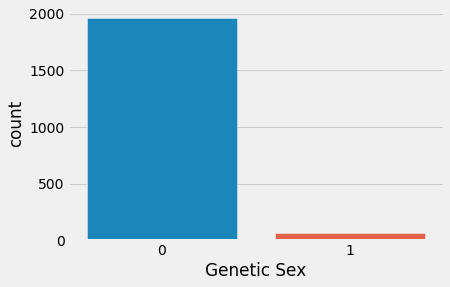

In [65]:
sns.countplot('Genetic Sex', data=feature_matrix);

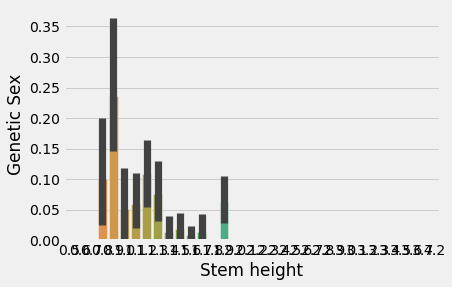

In [66]:
sns.barplot(x='Stem height', y='Genetic Sex', data=feature_matrix);

In [75]:
def create_feature_matrix(df): 
    dummified = pd.get_dummies(df.drop(columns=['Genetic Sex']))#data=df, columns=['Bowker Sex','Exposure of S. caninervis','Stem height','Number of inflorescences'])

  # selecting the features (feel free to add/change/etc.)
    feature_matrix = dummified#[[]]
    
    return feature_matrix
create_feature_matrix(feature_matrix).columns

Index(['Stem height', 'Number of inflorescences',
       'Exposure of S. caninervis_I', 'Exposure of S. caninervis_O',
       'Exposure of S. caninervis_U', 'Exposure of S. caninervis_nan',
       'Bowker Sex_F', 'Bowker Sex_S', 'Coordinate_T1-105',
       'Coordinate_T1-135', 'Coordinate_T1-150', 'Coordinate_T1-165',
       'Coordinate_T1-180', 'Coordinate_T1-195', 'Coordinate_T1-210',
       'Coordinate_T1-240', 'Coordinate_T1-30', 'Coordinate_T1-45',
       'Coordinate_T2-120', 'Coordinate_T2-135', 'Coordinate_T2-210',
       'Coordinate_T2-225', 'Coordinate_T2-255', 'Coordinate_T2-270',
       'Coordinate_T2-285', 'Coordinate_T2-315', 'Coordinate_T2-330',
       'Coordinate_T2-345', 'Coordinate_T2-360', 'Coordinate_T2-390',
       'Coordinate_T3-105', 'Coordinate_T3-135', 'Coordinate_T3-210',
       'Coordinate_T3-285', 'Coordinate_T3-315', 'Coordinate_T3-390',
       'Coordinate_T3-465'],
      dtype='object')

In [68]:
print('---Training Set Evaluation---')

x_train = np.array(create_feature_matrix(feature_matrix)) #create feature matrix
y_train = feature_matrix['Genetic Sex']


# Decision Tree;  max_depth = 10
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(x_train, y_train)
predictions = clf.predict(x_train)
print('Decision Tree: ', accuracy_score(predictions, y_train))

# Random Forest; max_depth = 10
clf2 = RandomForestClassifier(max_depth=10, random_state=42)
clf2.fit(x_train, y_train)
predictions = clf2.predict(x_train)
print('Random Forest: ', accuracy_score(predictions, y_train))

---Training Set Evaluation---
Decision Tree:  0.9752475247524752
Random Forest:  0.9737623762376237


In [69]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(x_train, y_train)
print(cross_val_score(clf, x_train, y_train, cv=5))
print(np.mean(cross_val_score(clf, x_train, y_train, cv=5)), np.std(cross_val_score(clf, x_train, y_train, cv=5)))

[0.97029703 0.97029703 0.9009901  0.9009901  0.97029703]
0.9425742574257425 0.033953323167291556


In [70]:
rf = RandomForestClassifier(min_samples_split = 10, random_state=42, bootstrap=True, max_depth=12)
rf.fit(x_train, y_train)
print(cross_val_score(rf, x_train, y_train, cv=5))
print('mean:', np.mean(cross_val_score(rf, x_train, y_train, cv=5)), 'std:', np.std(cross_val_score(rf, x_train, y_train, cv=5)))

[0.97029703 0.97524752 0.83910891 0.9009901  0.97524752]
mean: 0.9321782178217821 std: 0.05440141333788575


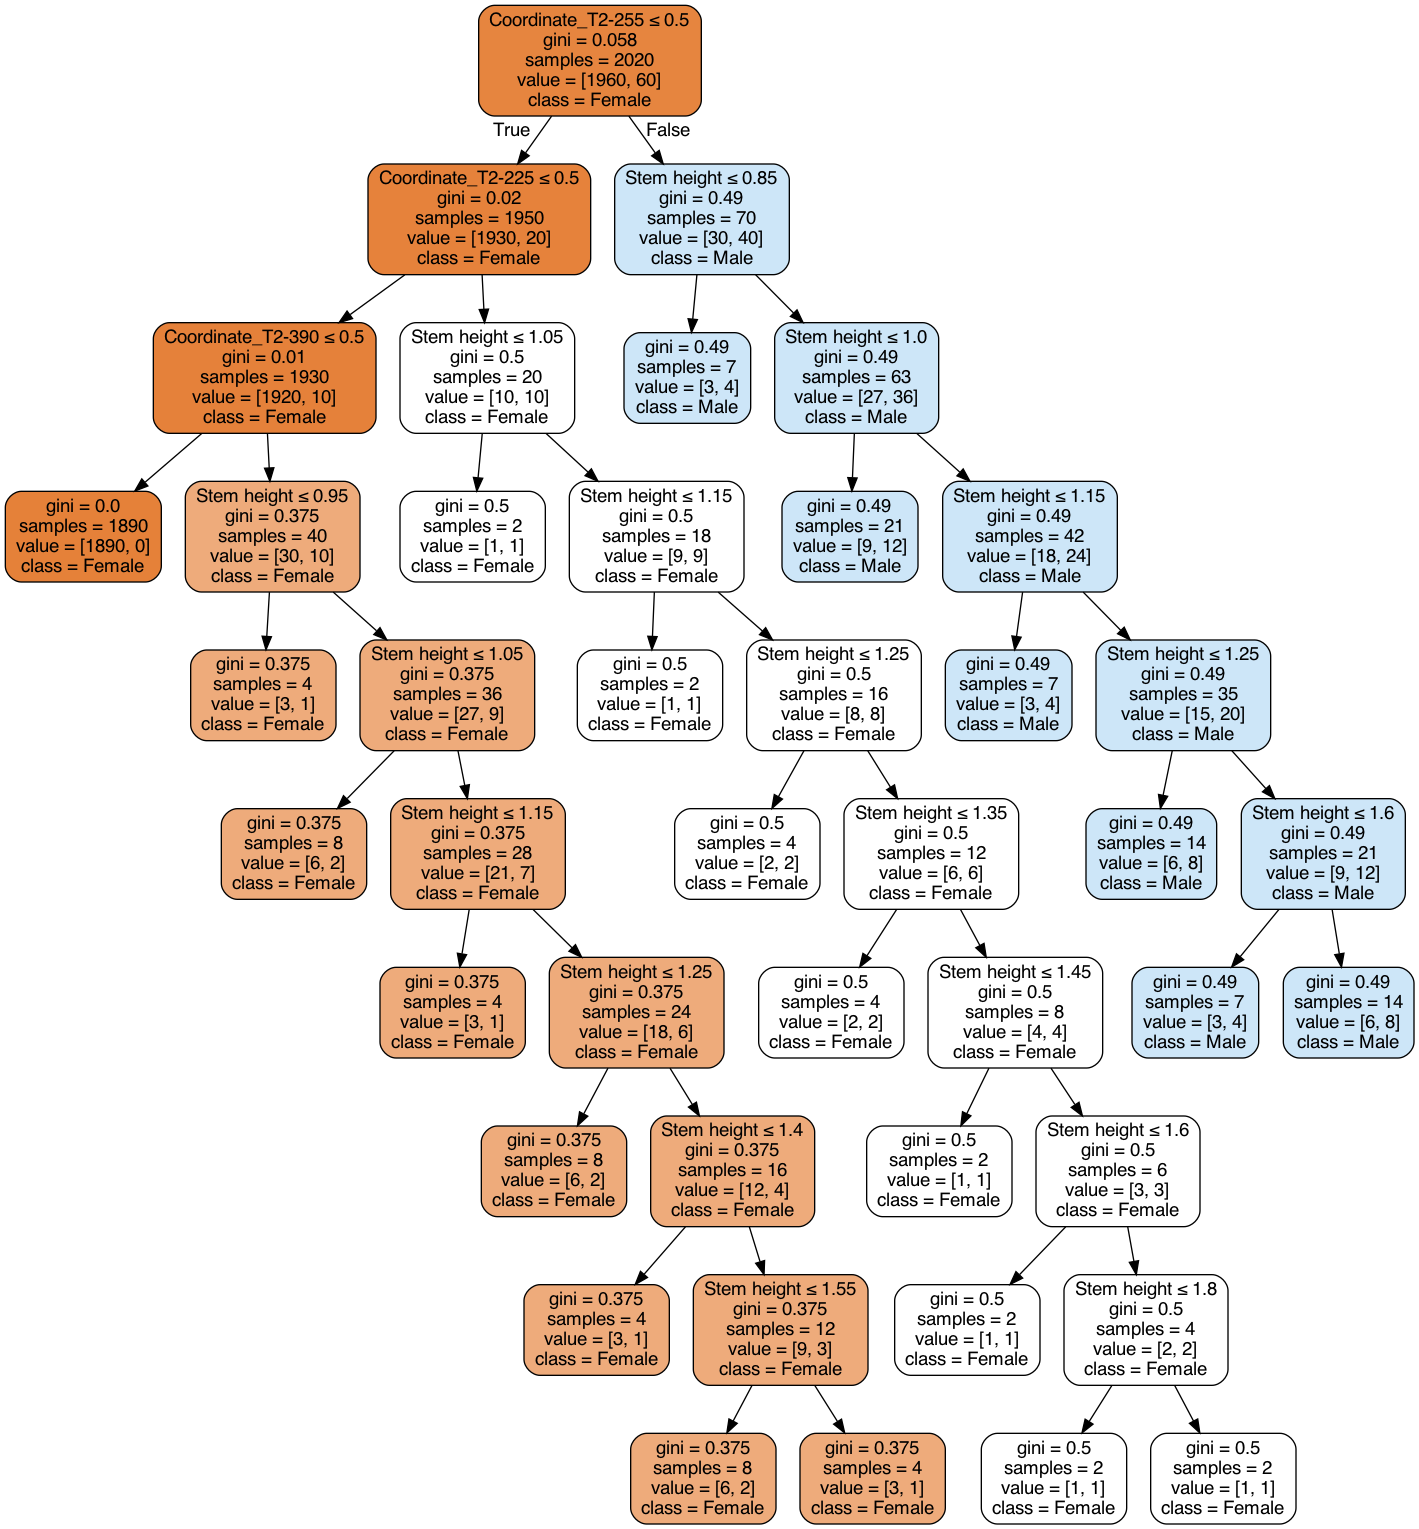

In [71]:
from IPython.display import Image  
import pydotplus 
import pydot
from sklearn.externals.six import StringIO
from sklearn import tree


dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile,
                     feature_names=list(create_feature_matrix(feature_matrix).columns),  
                         class_names=['Female', 'Male'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())